# Transfer Learning

## 1. Basic

* pre-trained model이 주어졌을 때, 전이가 유용한가?

> DNN에서 feature extractor + loss에서 feature extractor 역할을 하는 부분은 다른 곳에 활용해도 잘 작동하지 않을까? 라는 생각
>
> General한 pre-trained classifier를 다른 도메인에 적용

`-` Deep Belief Network

> Loss function이 없는 비지도학습 네트워크 개념
>
> 얘의 결과로 지도학습을 했더니, 결과가 좋더라 $\to$ DNN에서의 확장 가능성?

`-` Transfer Learning

* $\hat{f}$에 $x$를 삽입하여 feature를 추출 : Source model
* feature extractor에 input을 넣으면 숫자로 이뤄진 노드가 나옴
* 추출된 피쳐를 여러 개의 MLP에 입력하여 타겟 분류

> 모을 수 있는 데이터가 한정된 상황 + 컴퓨팅 자원도 한정된 상황 $\to$ 전이 학습으로 해결

`-` 핵심 가정

> 기존 커다란 소스 모델이 새로운 문제를 푸는 데에 도움이 되어야 함

1. $g_i : \mathcal{X}_s \to \mathcal{Y}_s$ hypothesis of source tasks $\to$ 기존의 모델
2. $f : \mathcal{X}_t \to \mathcal{Y}_s$ hypothesis of target task $\to$ 배우고 싶은 요소

$$g_i=w_i \circ c, ~ f = v \circ c. ~~ c \in \mathcal{C}, v \in \mathcal{V}$$

> $c$는 소스 데이터에서 학습 가능, $v$는 타겟 데이터로 학습 가능 $\to$ $v$만 배우면 됨
>
> $g_i, f$가 공유하는 특징 $c$가 커야 전이 학습이 효과적임. $v$는 $c$에 비해 단순한 데이터임, $g_i$는 대용량의 데이터셋으로 훈련된 모델

`-` Freezing, fine-tuning, additional layers

> 일단 소스 모델의 마지막 output layer를 제거하고, target task를 위한 additional layers를 부착, end-to-end 구조로 이뤄짐

* Scratch : target 데이터로만 퓨어하게 학습
* Freezing : additional layers만 훈련. 소스 모델의 가중치는 동결 $\to$ 새로 붙여놓은 레이어만 학습함.
* fine-tuning : 소스 모델의 가중치 = 정보가 있는 초기값은 일부만 조정됨 $\to$ 미세 조정. 초기 weight만 다르게 설정된 것임.

* 전체 모델을 재훈련 : 데이터가 적은 경우 모형이 일그러짐
* hybrid : feature extractor의 일부 레이어를 동결시키고, 일부 레이어만 같이 훈련
> 부착된 레이어는 랜덤 값을 할당하여 훈련, feature extractor의 가중치는 기존 값을 시작점으로 하여 미세하게만 바뀜
>
> 어느 지점에서 구간을 잘라야 할 것인지가 애매하므로, 보통은 Freezing 또는 fine-tuning을 사용함

* additional layers : 부착한 레이어만 훈련, 도메인이 비슷한 경우 유리
> additional layers만 훈련하는 경우에서 성능이 좋다면 그대로 사용하는 게 가장 좋음 : 소스 모델의 weight를 바꾸지 않으므로 계산 효율적

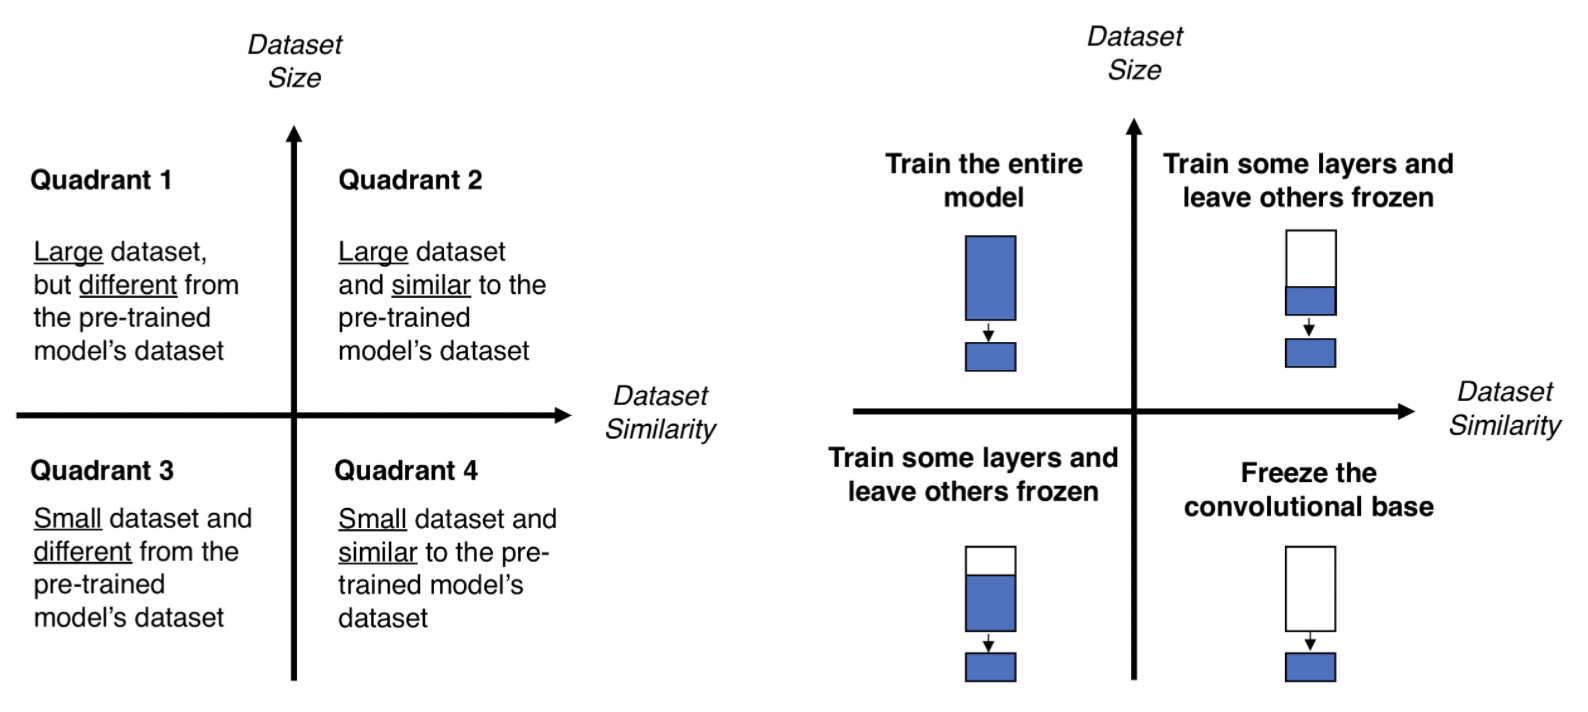

## 2. Mathmatical frameworks

`-` Risk of Transfer Learning

* $C(\mathcal{C}), C(\mathcal{V})$를 task $\mathcal{C}, \mathcal{V}$의 복잡도 측정값이라 하면 : Common / perfectly new task V

$$\tilde{O} \left( \frac{1}{\nu} \sqrt{\frac{C(\mathcal{C}) + t C(\mathcal{V})}{nt}} + \frac{C(\mathcal{V})}{m} \right)$$

$\to$ 모델의 오차에 대한 수식...

> $n$은 소스에서의 훈련 데이터셋 크기, m은 타겟에서의 데이터셋 크기, t는 task의 수
>
> 일단 $m$을 키우면 복잡도가 줄어들긴 함 $\to$ target sample size는 크기를 키우기 쉽지 않음... 애초에 크기를 키울 수 있었으면 전이학습을 할 이유가 없음
>
> 따라서 분자인 $C(\mathcal{V})$가 줄어들어야 함. 즉, 소스와 타겟의 공통 태스크 비중이 커야 복잡도가 줄어듦. $\to$ 새로 배우는 모델의 형태$(v)$가 단순해야 함
>
> nt가 커도 복잡도가 줄어듦(기 학습모형: 소스 모델이 큰 모델일 수록) $\to$ 복잡한 소스 모델을 가져오고, 작은 문제를 풀이할 수록 전이학습의 효과가 좋음
>
> 좋은 소스를 찾아서 타겟 문제를 해결하면 됨 ㅇㅇ

`-` Transfer Learning과 관련된 문제

`ex)` 여러 언어들을 배운 모델이 다른 언어를 쉽게 학습할 수 있을까? $\to$ Meta Learning 많이 나왔음

`ex2)` 배운 지식을 공통점이 조금 있는 다른 분야에서 활용 가능? $\to$ Adaptive Learning 연구 중

`ex3)` 학습 데이터의 분포와 평가 데이터의 분포가 다른 OOD 상황에서 모델이 정상 작동 가능? $\to$ OOD 문제 연구 중, 현실에서의 문제 해결에 매우 중요

`-` 모델 저장 형태

1. model & weight를 저장 : Llama
2. weight만 저장 $\to$ 똑같은 모델을 선언해야만 로드할 수 있음 $\to$ 이건 좀...

## 3. Practice

`-` Efficientnet

> 모델 아키텍쳐를 바꾸지 말고, 여러가지 파라미터들을 조화롭게 구성해보자 : 이미지 사이즈 / 레이어 개수 / 레이어 크기 등

### Imports

In [1]:
import random
import pandas as pd
import numpy as np
import os
import re
import glob
import cv2      ## image processing package : size, color, rotate, e.t.c.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import albumentations as A ## 이미지 증강 : 회전, 반전, 색감 조정으로 다양한 이미지 생성하여 데이터셋 증강
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.models as models ## 사용 가능한 소스 모델을 불러오는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score, classification_report
from tqdm.auto import tqdm ## 반복문 제어 패키지

/root/anaconda3/envs/AP/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


`-` 데이터셋에는 레이블과 이미지로 정리

In [ ]:
all_img_list = glob.glob(‘/content/data/hymenoptera_data/train/*/*’) ## 이미지 파일 이름들

> 레이블을 전부 불러오고, 해당하는 파일들의 path를 저장

In [ ]:
train_transform = A.Compose([A.Resize(CFG[’IMG_SIZE’],CFG[‘IMG_SIZE’]), ## 이미지 사이즈 정격화
                            A.Normalize(mean=(0.485, 0.456, 0.406),
                            std=(0.229, 0.224, 0.225),
                            max_pixel_value=255.0,p=1.0), ToTensorV2()]) ## mean, std가 저 값이 되도록 텐서 값을 정규화. 이미지 max_pixel_value 지정. 전체 이미지 p=1.0에 적용
test_transform = A.Compose([A.Resize(CFG[‘IMG_SIZE’],CFG[‘IMG_SIZE’]),
                            A.Normalize(mean=(0.485, 0.456, 0.406),
                            std=(0.229, 0.224, 0.225),
                            max_pixel_value=255.0,p=1.0), ToTensorV2()])

In [ ]:
e = preprocessing.LabelEncoder()
train[‘label’] = le.fit_transform(train[‘label’]) ;
test[‘label’] = le.transform(test[‘label’])

class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, transforms=None):
        self.img_path_list = img_path_list ; self.label_list = label_list
        self.transforms = transforms
    def __getitem__(self, index):
        img_path = self.img_path_list[index] ; image = cv2.imread(img_path)
        if self.transforms is not None:
            image = self.transforms(image=image)[‘image’]
        if self.label_list is not None:
            label = self.label_list[index]
            return image, label
        else:
            return image
    def __len__(self):
        return len(self.img_path_list)

In [ ]:
train_dataset = CustomDataset(train[‘img_path’].values, \
                                train[‘label’].values, train_transform)
train_loader = DataLoader(train_dataset, batch_size = CFG[‘BATCH_SIZE’], \
                                shuffle=True, num_workers=0) ## 데이터 가져올 때 셔플링, 워커 사용하지 않음
test_dataset = CustomDataset(test[‘img_path’].values, \
                            test[‘label’].values, test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG[‘BATCH_SIZE’], \
                        shuffle=True, num_workers=0)
val_loader = test_loader

> DataLoader 만드는 것까지 숙달 일단은...